# Diferenciální rovnice 1

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.integrate import solve_ivp

* Ve cvičení začínáme částí A, řešení modelu dynamické rovnováhy druhů z
  přednášky.
* Kdo je schopen postupovat podle textu a řešit úkoly samostatně, může pracovat
  dopředu a pokračovat částí B, kde jsou na modelu ochlazování kávy možnosti
  příkazu pro řešení diferenciálních rovnic.
* Část C se vrací k modelu dynamické rovnováhy, ukazuje příklad, jak je možné
  nakreslit křivky řídící rychlosti kolonizace a vymírání a jak je možné
  prozkoumat chování modelu při různých počátečních podmínkách a různých
  hodnotách parametru. Zájemci by měli být schopni si tyto pasáže projít sami. 

## Část A: Řešení diferenciální rovnice (modifikace existujícího kódu)

Pokud jste rychlejší, řešte samostatně a pokračujte samostatně k části B s
detailnějším popisem příkazu `solve_ivp`.


### Řešení rovnice a vizualizace řešení. 

Následující kód vyřeší rovnici $$\frac{\mathrm dN}{\mathrm dt}= \frac
b{D(N+\beta)}-a\frac {N^k}S$$ dynamické rovnováhy na ostrově s nulovou počáteční
podmínkou. 


#### Úkoly:

1. Prohlédnout si kód, ujasnit si co dělá, spustit.
1. Vyzkoušejte si zadání více počátečních podmínek, například 
  řádek `pocatecni_podminka = [0]` vyměňte za `pocatecni_podminka = [0,5,10,20]`. Tím získáte řešení pro několik počátečních podmínek současně.
1. Vyzkoušejte si změnit úlohu.
  Vykopírujte text do nové buňky (můžete duplikovat buňku a kopii potom upravovat) a opravte tak, aby zobrazoval řešení počáteční
  úlohy $$\frac{\mathrm dT}{\mathrm dt}=-0.1(T-20), \quad T(0)=100$$ s
  ochlazováním kávy. I zde zkuste více počátečních podmínek.
1. Vyzkoušejte si do půodního modelu ostrovní biodiverzity doplnit křivku odpovídající řešení pro ostrov ve dvojnásobné vzdálenosti od pevniny. Zkontrolujte, že kód kreslí dvě funkce a že se pro vzdálenější ostrov řešení chová tak, jak očekáváte. Pro začátek můžete recyklovat kód kde se řeší jedna rovnice a řetezit výpočty za sebe. Později si ukážeme lepší řešení. Pokud chcete všechny výstupy příkazu `plot` mít v jednom obrázku, musíte je volat ve stejné buňce. Možná se bude hodit si nadefinovat funkci `model2` nějak takto.
``` python
def model2(t,N):
    return model(t,N,D=1)
```



In [ ]:
### Příprava funkcí a parametrů
pocatecni_podminka = [0]  # počáteční podmínka nebo podmínky
meze = [0,15]  # interval, na kterém hledáme řešení
n = 100 # počet dělících bodů

def model(t, N, a=1, b=8, beta=0.2, D=0.5, k=1.3, S=20):
    """
    Funkce z pravé strany modelu dynamické rovnováhy počtu druhů na ostrovech, 
    podle McArthura a Wilsona. 
    
    Vstup:
    -----
    Povinnými parametry jsou čas a počet druhů, volitelnými vzdálenost 
    D od pevniny, rozloha ostrova S, další parametry modelu a konstanty 
    úměrnosti. Přednastavené hodnoty jsou pouze ilustrační, závisí na volbě
    jednotek a konkrétním použití.
    
    Výstup:
    ------
    Hodnota funkce.
    """
    kolonizace = b/(D*(N+beta))
    vymirani = a*N**k/S 
    return  kolonizace - vymirani 

### Řešení modelu
t=np.linspace(*meze, n)  # definiční obor, v těchto bodech budeme hledat řešení
reseni = solve_ivp(
                   model,
                   meze,
                   pocatecni_podminka,
                   t_eval=t
                   )

### Vizualizace řešení
fig,ax = plt.subplots(1)
ax.plot(t,reseni.y.T)
ax.set(
    ylim = (0,None),
    title = "Dynamická rovnováha počtu druhů na ostrově",
    xlabel="čas",
    ylabel="počet druhů",
);

In [ ]:
?model

### Řešení pro sadu parametrů

Následující kód řeší vícekrát rovnici dynamické rovnováhy pro několik různých
vzdálenosti ostrova od pevniny optimálním způsobem, kdy parametry získáme z předdefinovaného seznamu, nejprve vypočteme všechna řešení a data uložíme do tabulky a teprve poté data vykreslíme. Tím je jasně daná struktura, kde se připravují výpočty, kde se počítají data a kde se data prezentují. Pro malé projekty toto není tak důležité, při delším kódu to značně zvýsí přehlednost s udržovatelnost.

V čem se kód změní od předchozího? Prohlédněgte si [diff](https://gist.github.com/robert-marik/186cb003476f88526455af53d0121adc/revisions?diff=split&w=) obou kódů.

* Používá se proměnná se seznamem parametrů.
* Data se ukládají do tabulky, protože místo jednoho řešení budeme mít řešení několik.
* Ve volání příkazu `solve_ivp` se předává hodnota parametru.
* Příkazy pro řešení rovnice a uložení do tabulky jsou volány v cyklu.
* Pro kreslení se dá použít metoda `plot` pro tabulky.

In [ ]:
### Příprava funkcí a parametrů
pocatecni_podminka = [0]  # počáteční podmínka
meze = [0,15]  # interval, na kterém hledáme řešení
n = 100 # počet dělících bodů
parametry = [0.25,0.5,1,2] # seznam parametrů


def model(t, N, a=1, b=8, beta=0.2, D=0.5, k=1.3, S=20):
    """
    Funkce z pravé strany modelu dynamické rovnováhy počtu druhů na ostrovech, 
    podle McArthura a Wilsona. 
    
    Vstup:
    -----
    Povinnými parametry jsou čas a počet druhů, volitelnými vzdálenost 
    D od pevniny, rozloha ostrova S, další parametry modelu a konstanty 
    úměrnosti. Přednastavené hodnoty jsou pouze ilustrační, závisí na volbě
    jednotek a konkrétním použití.
    
    Výstup:
    ------
    Hodnota funkce.
    """
    kolonizace = b/(D*(N+beta))
    vymirani = a*N**k/S 
    return  kolonizace - vymirani 

### Řešení modelu
t=np.linspace(*meze, n)  # definiční obor, v těchto bodech budeme hledat řešení
df = pd.DataFrame(index=t, columns=parametry)      # tabulka pro výstup

for parametr in parametry:
    reseni = solve_ivp(
                       lambda t,x:model(t,x,D=parametr),
                       meze,
                       pocatecni_podminka,
                       t_eval=t
                       )
    df[parametr] = reseni.y.T # další sloupec tabulky
    # lambda funkce viz https://www.w3schools.com/python/python_lambda.asp
    # (dočasná nepojmenovaná funkce)

### Vizualizace řešení
ax = df.plot()
ax.set(
    ylim = (0,None),
    title = "Dynamická rovnováha počtu druhů na ostrově",
    xlabel="čas",
    ylabel="počet druhů",
)
plt.legend(title="Vzdálenost ostrova");

#### Úkoly

* Vyzkoušejte si kód.
* V nové buňce sledujte vliv rozlohy ostrova (vzdálenost je stejná) na druhovu
  skladbu. Vykopírujte si kód a proveďte příslušnou modifikaci.
* Před každou buňku s výpočty vložte textovou buňku popisující, co se ve výpočtu
  odehrává, co se snažíme ukázat. Musíte vložit buňku, změnit typ z Code na
  Markdown (vybrat buňku a stisknout M, nebo použít rozbalovací menu v toolbaru a vepsat komentář.
* Pokud jsou veličiny $S$ a $D$ ve stále stejném poměru, je stejná i hodnota, ke
  které konverguje řešení (viz přednáška). 
  * Znamená to, že se budou populace
  vyvíjet stejně na daném ostrově a na ostrově, který je dvakrát větší a
  dvakrát dále? V čem se bude situace lišit a v čem bude stejná? 
  * Odhadněte
  odpověď a potvrďte si  hypotézu tak, že budete modelovat plnou
  diferenciální rovnici pro obě uvažované situace. Můžete použít něco jako
  `lambda t,x:model(t,x,D=0.5*nasobek,S=20*nasobek)` a proměnnou `nasobek` nechat iterovat přes seznam `[1,2]` (případně delší seznam).

Vyzkoušejte si i následující kód (s nastavením funkce model jako v původní buňce). Vodorovně je velikost populace, svisle rychlost kolonizace resp. vymírání. Využíváme toho, že jeden z členů ve funkci z pravé strany rovnice lze eliminivat tak, že konstanta, která tento člen násobí, bude nulová.

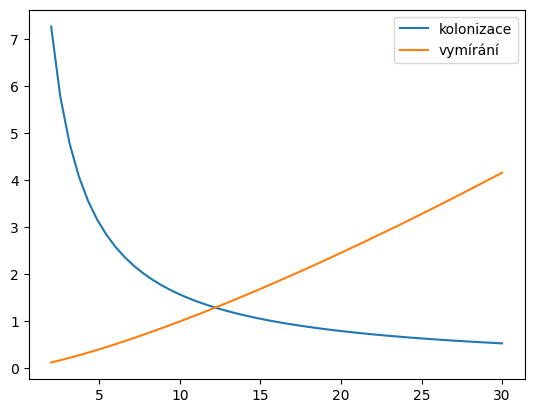

In [8]:
def model(t, N, a=1, b=8, beta=0.2, D=0.5, k=1.3, S=20):
    kolonizace = b/(D*(N+beta))
    vymirani = a*N**k/S 
    return  kolonizace - vymirani 

N = np.linspace(2,30)
plt.plot(N,model(0,N,a=0),N,-model(0,N,b=0))
plt.legend(['kolonizace','vymírání'])

## Část B: Řešení diferenciální rovnice (podrobnější pohled pod kapotu)

Příkaz `solve_ivp` dokáže vyřešit zadanou diferenciální rovnici pro několik počátečních podmínek. Použití je možné vidět na následujícím příkladě. Pro tři počáteční podmínky $y(0)=2$, $y(0)=4$ a $y(0)=8$  řešíme rovnici $$\frac{\mathrm dy}{\mathrm dt}=-0.5 y,$$
kterou je možno chápat jako rovnici ochlazování, nebo jako rovnici radioaktivního rozpadu. Výstupem je objekt, který v sobě obsahuje kromě vypočtených dat i další informace, například zda se podařilo rovnici vyřešit. 

In [ ]:
pocatecni_podminky = [2, 4, 8]
meze = [0,10]
def rovnice(t, y): 
    return -0.5 * y
sol = solve_ivp(rovnice, meze, pocatecni_podminky)
sol


Následující příkazy vytisknou časy ve kterých bylo vypočteno řešení a hodnotu každého z řešení v daném čase.

In [ ]:
print(sol.t)
print(sol.y)

Pro pohodnější práci je možné data zadat do tabulky, kde v prvním sloupci bude čas a v dalších sloupcích budou vypočtená řešení. Název sloupce bude dán počáteční podmínkou. Je vidět, že tímto číslem každé řešení i začíná.

In [ ]:
df = pd.DataFrame()
df.index = sol.t
for i,j in zip(pocatecni_podminky, sol.y):
    df[i] = j
df

Po vykreslení vidíme, že graf je z lomených čar. Pro výraznost jsme přidali i tečky v bodech zlomu. To proto, že řešení byla vypočtena a v několika málo bodech.

In [ ]:
df.plot(style="o-");

### Úkol

Vyzkoušejte si následující elegantnější příkazy. Pomocí nich nemusíme dělat cyklus přes jednotlivá řešení při sestavování tabulky a můžeme nakreslit všechna tři řešení jedním příkazem i bez sestavování tabulky. Snažte se zjistit, co dělá operátor `T`.

In [ ]:
plt.plot(sol.t,sol.y.T,"o-");

In [ ]:
df = pd.DataFrame(sol.y.T,columns=pocatecni_podminky)
df.index = sol.t
df

In [ ]:
pd.DataFrame(sol.y)

In [ ]:
pd.DataFrame(sol.y.T)

### Řešení hladšími křivkami 

Řešení z minulých ukázek se skládalo z lomených čar. Nemělo spojitou derivaci, nebylo hladké. Pro hladší řešení je možné provést jednu nebo více z následujících vylepšení.

* Zvolit menší krok, aby se vygenerovalo více hodnot pro čas $t$, 
* Nastavit proměnnou `t_eval` na dostatečně hustou posloupnost bodů. Toto jsme si vyzkoušeli v úvodní části.
* Nastavit hodnotu `dense_output` na True a řešení poté kreslit na husté množině bodů. Toto si vyzkoušíme níže.

Volba kroku také bývá základním testem korektnosti numerického řešení. Příliš velký krok může způsobit nepřesnosti v řešení, příliš malý krok je náročný na paměť i výpočetní výkon a také může vést k nepřesnostem. Obvyklým testem je porovnat řešení se zvoleným a s polovičním krokem. Pokud se shodují, je rozumné výsledek přijmout jako dobrou aproximaci přesného řešení.

In [ ]:
sol = solve_ivp(
    rovnice, 
    meze, 
    pocatecni_podminky,
    dense_output=True,
    # max_step=np.Inf, # defaultní nastavení je krok libovolné délky
    )
sol

In [ ]:
t = np.linspace(*meze,500)
df = pd.DataFrame(np.array(sol.sol(t)).T,columns=pocatecni_podminky)
df.index = t

print(df.shape)
print(df.head())

ax = df.plot()
ax.legend(title="Počáteční podmínka");

### Řešení rovnice pro různé hodnoty parametru

Někdy potřebujeme řešit rovnici a sledovat, jak se chová řešení při změně parametru. Vyjdeme ze stejné počáteční podmínky a pro nastavené hodnoty parametru najdeme řešení. 

In [ ]:
def rovnice_r(t, y, r=1):  
    return -r*y # prava strana rovnice zavisi na parametru r

meze = [0,10]
hodnoty_r = [0.5,1,2,3]
pocatecni_podminka = [100] # Jedna pocatecni podminka

t = np.linspace(*meze,500) # hvezdicka rozbali pole na dve hodnoty pro dolni a horni mez

reseni = [solve_ivp(
                    rovnice_r, 
                    meze, 
                    pocatecni_podminka,
                    t_eval=t,
                    args=[r]
                    ).y[0]
            for r in hodnoty_r]
        # vygenerovani reseni pro ruzne hodnoty parametru r    |
df = pd.DataFrame(
                    np.array(reseni).T,
                    columns=hodnoty_r
                )
df.index = t

print(df.shape) # tisk informaci o tabulce a graf
print(df.head())

ax = df.plot()

ax.legend(title=r"Koeficient $r$");

Někdy se může hodit si funkci definující pravou stranu nepojmenovávat a nepředávat jí parametry. Například, pokud je její použití jednorázové. Potom je možno použít metodiku práce s [nepojmenovanými funkcemi](https://www.w3schools.com/python/python_lambda.asp), takzvané `lambda` funkce. Ta umožňuje zadat pravou stranu rovnice přímo v příkazu `solve_ivp`.

In [ ]:
hodnoty_r = [0.5,1,2,3]
pocatecni_podminka = [100] # Jedna pocatecni podminka

reseni = [solve_ivp(
                    lambda t,y: -r*y, 
                    meze, 
                    pocatecni_podminka,
                    t_eval=t
                    ).y[0]
            for r in hodnoty_r]
        # vygenerovani reseni pro ruzne hodnoty parametru r    

t = np.linspace(*meze,500) # hvezdicka rozbali pole na dve hodnoty pro dolni a horni mez
df = pd.DataFrame(np.array(reseni).T, columns=hodnoty_r, index=t)

ax = df.plot()
ax.legend(title=r"Koeficient $r$");

## Část C: Model rovnováhy počtu druhů na ostrovech (volitelně, kdo je rychlejší a samostatný)

V této části již nebude nic nového, ale je to ukázka, jak získané znalosti
využít při studiu modelů.

Budeme studovat Mc Arthurův a Wilsonův model vývoje ostrovního společenství ve tvaru
$$
  \frac{\mathrm dN}{\mathrm dt}= \frac b{D(N+\beta)}-a\frac {N^k}S,
$$
kde $N$ je počet druhů na ostrově o velikosti $S$ ve vzdálenosti $D$ od pevniny. Všechny parametry $a$, $b$, $\beta$ a $k$ jsou kladné, parametr $k$ splňuje $k>1$.

První člen na pravé straně charakterizuje rychlost kolonizace, druhý člen
rychlost vymírání. 

* Nakreslíme si křivky kolonizace a vymírání. 
  * Nejprve překreslíme obrázek, který se často vyskytuje v publikacích k
    problematice. Dvě křivky vymírání pro dvě rozlohy ostrova, dvě křivky
    kolonizace pro dvě vzdálenosti ostrova od pevniny. Z jejich průsečíků je
    možné odhalit, při jakém počtu druhů nastane dynamická rovnováha.
  * V předchozím obrázku je příliš informací, což je někdy na škodu. Ve druhém
    obrázku necháme jenom jednu z křivek kolonizace, ať je lépe možné sledovat
    rovnovážnou polohu v závislosti na rozloze ostrova. 
  * Dále vyřešíme model pro různé počáteční podmínky. Není překvapení, že vždy
    se nastolí rovnováha. 
  * Nakonec vyřešíme model pro různé hodnoty parametru. 

### Grafy rychlostí kolonizace a vymírání

Vykreslíme křivky kolonizace a vymírání (přesněji, rychlostíi těchto dějů) v závislosti na velikosti populace. Pokud některým detailům nerozumíte, hledejte vysvětlení u vyučujícího, u kolegů, pomocí Google nebo pomocí umělé inteligence. [Takto](https://chat.openai.com/share/fc696529-1e8f-4429-9d8c-33e5d801ffd5) chatboot vysvětlí obrat s `"k--"` při kreslení jedné z křivek.

In [ ]:
def kolonizace(N,b=10,beta=1,D=1):
    return b/(D*(N+beta))

def vymirani (N, S=1, a=1, k=1.5):
    return a*N**(k)/S

N = np.linspace(0,10,100)
plt.plot(N,kolonizace(N, D=1),"k-",label="kolonizace, blízký ostrov")
plt.plot(N,kolonizace(N, D=2),"k--",label="kolonizace, vzdálený ostrov")

plt.plot(N,vymirani(N, S = 10),"r-",label=r"vymírání, velký ostrov")
plt.plot(N,vymirani(N, S = 2),"r--",label=r"vymírání, malý ostrov")
plt.legend()
ax = plt.gca()
ax.set(
    ylim=(0,10), 
    xlim=(0,10),
    title="Dynamika vývoje počtu druhů na ostrově",
    xlabel="počet druhů",
    ylabel="rychlost kolonizace a vymírání",
    xticks=[],
    yticks=[]
    );
    

Zkusíme zafixovat rychlost kolonizace a sledovat vymírání jako funkci obsahu ostrova. Měli bychom vidět, že pro menší ostrov je větší rychlost vymírání. Rovnovážný počet druhů najdeme jako průsečík křivky vymírání s čárkovanou křivkou kolonizace. Měli bychom vidět, že první souřadnice průsečíku je pro menší ostrov menší.

In [ ]:
# def kolonizace(N,b=10,beta=1,D=1):
#     return b/(D*(N+beta))
# def vymirani (N, S=1, a=1, k=1.4):
#     return a*N**(k)/S
meze = [0,10]
obsahy = [2,4,8]

N = np.linspace(*meze,100)
df = pd.DataFrame()
df["N"] = N    
for S in obsahy:
    df[S] = vymirani(N, k=1.5, S = S)

fig,ax = plt.subplots(1)
ax.plot(N,kolonizace(N),"--",label="_nolegend_") 
df.plot(x="N", ax=ax)   

ax.legend(title="Obsah ostrova", loc="upper left")
ax.text(N[-1], kolonizace(N[-1]), "kolonizace", color="C0", ha="right", va="top")
ax.set(
    ylim=(0,10), 
    xlim=meze,
    title="Dynamika vývoje počtu druhů na ostrově",
    xlabel="počet druhů",
    ylabel="rychlost kolonizace a vymírání",
    xticks=[],
    yticks=[]
    );


### Řešení diferenciální rovnice 

Nyní budeme diferenciální rovnici řešit. Použijeme bezrozměrný tvar $$ \frac{\mathrm dn}{\mathrm d\tau}=\frac{1}{n+1}-\alpha n^k,$$ kde $\alpha = \frac{a\beta ^k}{S}\frac{\beta D}{b}$, $n=\frac N\beta$ a $\tau = \frac{b}{\beta D} \frac t\beta$. Tedy parametr $\alpha$ je nepřímo úměrný obsahu ostrova a přímo úměrný vzdálenosti od ostrova, velikost populace měříme v násobcích parametru $\beta$ a rychlost plynutí času se mění se vzdáleností od ostrova.


### Závislost na počáteční podmínce

Využijeme toho, že je možné zadat celou sadu počátečních podmínek a že nemusíme
řešit rovnici pro každou počáteční podmínku samostatně. Kromě toho zafixujeme
barvu kreslení na první barvu v sadě (`C0`), protože nemá smysl jednotlivá
řešení odlišovat barevně. Protože křivek je hodně, změníme tloušťku čáry.

In [ ]:
pocatecni_podminka = np.arange(0,1,0.1)
meze = [0,5]
def rovnice(t, n, alpha=1, k=1.4):
    return 1/(n+1) - alpha*n**k

t = np.linspace(*meze, 100)  # definicni obor pro reseni
reseni = solve_ivp(rovnice, meze, pocatecni_podminka, t_eval=t)

fig,ax = plt.subplots(1)
ax.plot(t,reseni.y.T,color="C0",lw=1)
ax.set(
    ylim=(0,None),
    title="Diferenciální rovnice ostrovní dynamiky",
    xlabel="bezrozměrný čas",
    ylabel="bezrozměrný počet druhů",
);

### Závislost na parametru $\alpha$

In [ ]:
pocatecni_podminka = [0]
meze = [0,5]
alphas = [2,4,6,8]
k = 1.4

t = np.linspace(*meze, 100) # časy ve kterých určíme hodnotu řešení
def rovnice(n, alpha=1, k=1.4):
    return 1/(n+1) - alpha*n**k
# Trochu jiná taktika určení řešení. Budeme ukládat rovnou hodnoty 
# řešení v uvedených bodech, tj. za příkazem pro 
# řešení použijeme .y[0]    
reseni = [
            solve_ivp(lambda t,n: rovnice(n,alpha=alpha, k=k), 
                      meze, 
                      pocatecni_podminka, 
                      t_eval=t,
                     ).y[0]
            for alpha in alphas
         ]
df = pd.DataFrame(np.array(reseni).T, columns=alphas)
df.index = t
ax = df.plot(
    title="Diferenciální rovnice ostrovní dynamiky",
    xlabel="bezrozměrný čas",
    ylabel="bezrozměrný počet druhů",
)
ax.legend(title=r"Parametr $\alpha$");